<a href="https://colab.research.google.com/github/albin2122/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Credit Card Default Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
credit_df=pd.read_excel('/content/drive/MyDrive/AlmaBetter/Modules/Topics/Project/Project-3-Classification/default of credit card clients.xls',header=1)

### Dataset First View

In [4]:
# Dataset First Look
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
row_count=credit_df.shape[0]
column_count=credit_df.shape[1]
print(f'no of rows is {row_count} ')
print(f'no of columns is {column_count}')

no of rows is 30000 
no of columns is 25


### Dataset Information

In [6]:
# Dataset Info
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
credit_df[credit_df.duplicated()].count()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
missing_value=credit_df.isnull().sum()
print(missing_value)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [9]:
# Visualizing the missing values
#there is no missing values

### What did you know about your dataset?

credit_df is a dataset containing 30000 rows and 25 columns.It does not have any null values or any duplicates. All values are of int data type. So it will be much easier to clean the data

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [11]:
# Dataset Describe
credit_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Variables Description 

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following variables as explanatory variables: \
* ID: Unique ID of each client \
* LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. \
* Gender: 1 = male; 2 = female \
* Education: 1 = graduate school; 2 = university; 3 = high school; 4 = others \
* Marital status: 1 = married; 2 = single; 3 = others). \
* Age: Age in years \


**History of past payment.** \

We tracked the past monthly payment records from April to September, 2005.The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. \
* PAY_0: Repayment status in September, 2005

* PAY_2: Repayment status in August, 2005

* PAY_3: Repayment status in July, 2005

* PAY_4: Repayment status in June, 2005

* PAY_5: Repayment status in May, 2005

* PAY_6: Repayment status in April, 2005 \



**Amount of bill statement (NT dollar). \**

* BILL_AMT1: Amount of bill statement in September, 2005

* BILL_AMT2: Amount of bill statement in August, 2005

* BILL_AMT3: Amount of bill statement in July, 2005

* BILL_AMT4: Amount of bill statement in June, 2005

* BILL_AMT5: Amount of bill statement in May, 2005

* BILL_AMT6: Amount of bill statement in April, 2005
* default.payment.next.month: Default payment (1=yes, 0=no)

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for uni in credit_df.columns:
  unique_values=credit_df[uni].unique()
  print(f'unique values in {uni} column are {unique_values}')

unique values in ID column are [    1     2     3 ... 29998 29999 30000]
unique values in LIMIT_BAL column are [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
unique values in SEX column are [2 1]
unique values in EDUCATION column are [2 1 3 5 4 6 0]
unique values in MARRIAGE column are [1 2 3 0]
unique values in AGE column are [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54

## 3. ***Data Wrangling***

### Data Wrangling Code

Column Education

In [13]:
# Write your code to make your dataset analysis ready.
credit_df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

Education: 1 = graduate school; 2 = university; 3 = high school; 4 = others , but here it contains 0,5,6 which can be included in the others group. So to avoid more complexity we could replace the values with the value 4

In [14]:
fill = (credit_df.EDUCATION == 0) | (credit_df.EDUCATION == 5) | (credit_df.EDUCATION == 6)
credit_df.loc[fill, 'EDUCATION'] = 4

In [15]:
credit_df['EDUCATION'].unique()

array([2, 1, 3, 4])

Changing name of the column default payment next month to Default to make it simple

In [16]:
credit_df = credit_df.rename(columns={'default payment next month': 'Default'})

In [17]:
credit_df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


Changing the name of column PAY_0 to PAY_1 since rest all start from 1 (like BILL_AMT1, PAY_AMT1)

In [18]:
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

In [19]:
credit_df = credit_df.rename(columns={'PAY_0': 'PAY_1'})

In [20]:
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

### What all manipulations have you done and insights you found?



1.   The extra values in the column education , that is 0,5,6 has been replaced with 4 (categorically other type)
2.   Column default payment next month was renamed to Default to have a simple column name
3. Column PAY_0 changed into column PAY_1



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Education vs Default

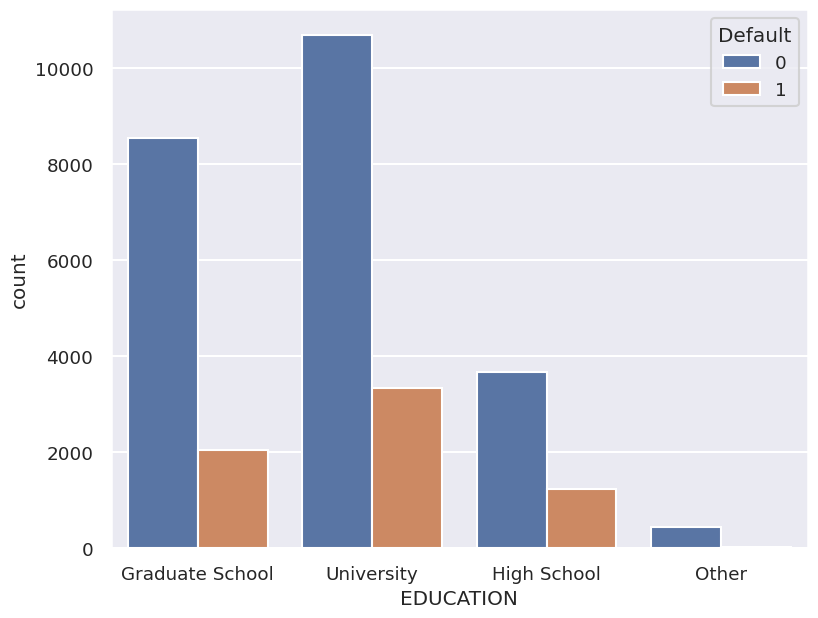

In [21]:
# Chart - 1 visualization code
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

edu = sns.countplot(x='EDUCATION', hue='Default', data=credit_df)
edu.set_xticklabels(['Graduate School','University','High School','Other'])
plt.show()

In [22]:
default0 = credit_df.groupby(credit_df['EDUCATION'][credit_df['Default'] == 0]).size().reset_index(name='NOT_Default')
default1 = credit_df.groupby(credit_df['EDUCATION'][credit_df['Default'] == 1]).size().reset_index(name='Default')
total = credit_df.groupby('EDUCATION').size().reset_index(name='TOTAL')

eduTable = default0.join(default1['Default']).join(total['TOTAL'])
eduTable['EDUCATION'] = ['Graduate School','University','High School','Other']
eduTable['NOT_Default'] = round((default0['NOT_Default']/total['TOTAL'])*100,2)
eduTable['Default'] = round((default1['Default']/total['TOTAL'])*100,2)

eduPct = eduTable.iloc[:,0:3]
eduPct = eduPct.rename(columns={'NOT_Default': 'NOT_Default(%)', 'Default': 'Default(%)'})

eduPct

,EDUCATION,NOT_Default(%),Default(%)
0,Graduate School,80.77,19.23
1,University,76.27,23.73
2,High School,74.84,25.16
3,Other,92.95,7.05


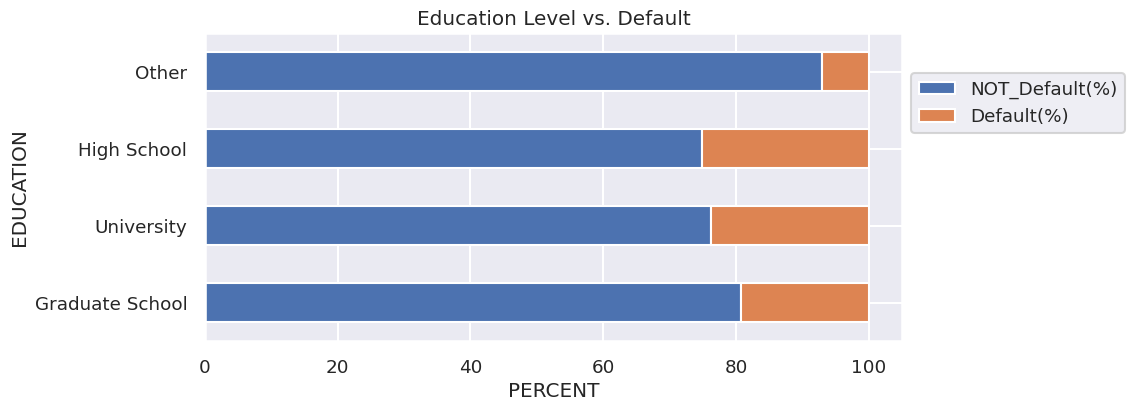

In [23]:
sns.set(rc={'figure.figsize':(9,4)})
sns.set_context("talk", font_scale=0.8)

ax = eduPct.plot(x='EDUCATION', kind='barh', stacked=True, title='Education Level vs. Default')
ax.set_xlabel('PERCENT')
ax.get_legend().set_bbox_to_anchor((1, 0.9))
plt.show()


##### 1. Why did you pick the specific chart?

To know whether education is a factor in determining  the number of cases in  defaulting the credit card payment

##### 2. What is/are the insight(s) found from the chart?

* default count is lesser for high school ,but as per default percentage High School level have higher chance of Default.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. High school level shows high level of default, this does show the immaturity of the high school level and it is advisable not to give credits or rather there should be strict measures to taken care while giving credit

#### Chart - 2 - Gender vs default

<Axes: xlabel='SEX', ylabel='count'>

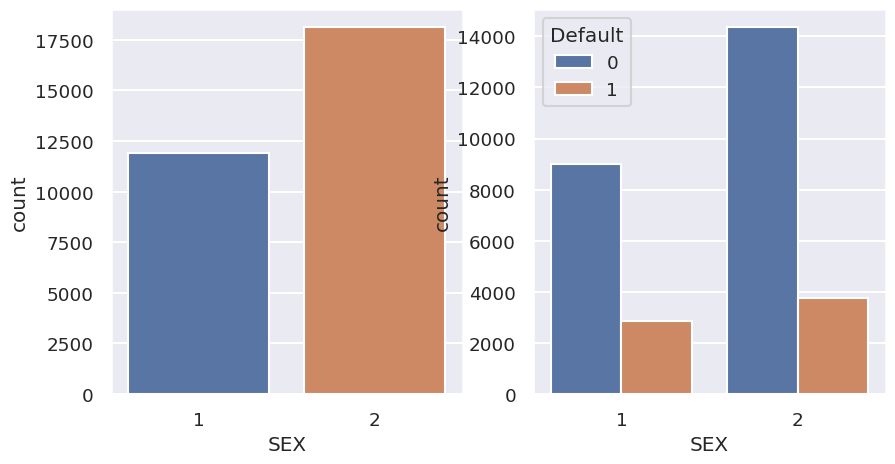

In [24]:
# Chart - 2 visualization code
#count plot for Sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = credit_df)
sns.countplot(x = 'SEX', hue = 'Default',ax = axes[1], data = credit_df)


##### 1. Why did you pick the specific chart?

To understand the gender that default more 

##### 2. What is/are the insight(s) found from the chart?

* Gender female has higher number of  credit cards than male as per the data
* The default count is comparitively same for both the genders hence gender doesnot become a criteria for defaulting.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, as we found from the chart that there is no direct relatioship between gender and defaulting, so giving credits doesnot apply the feature gender

#### Chart - 3- Distribution of limit balance

Text(0.5, 1.0, 'Distribution Plot of Limit Balance')

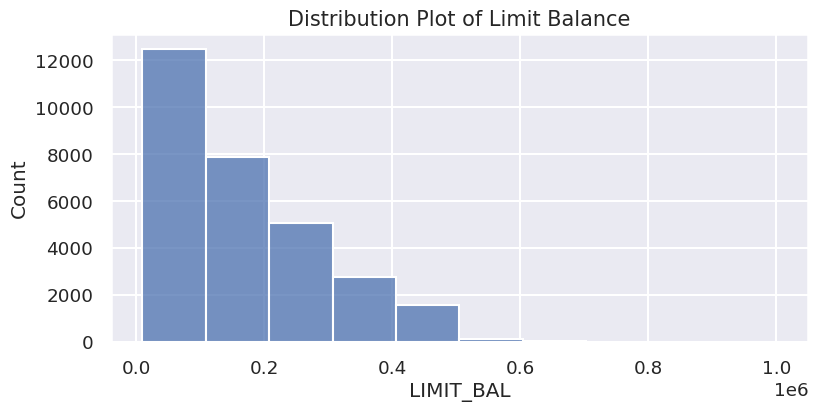

In [25]:
# Distribution analysis of Limit Balance
hist = sns.histplot(credit_df['LIMIT_BAL'],bins=10)
hist.set_title('Distribution Plot of Limit Balance', size=15)

##### 1. Why did you pick the specific chart?

distribution of limit balance 

##### 2. What is/are the insight(s) found from the chart?

Most of the customers get up to 2 lakhs of credit limit balance.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is important to know how much limit balance shouldbe given 

#### Chart - 4 - limit bal and education level

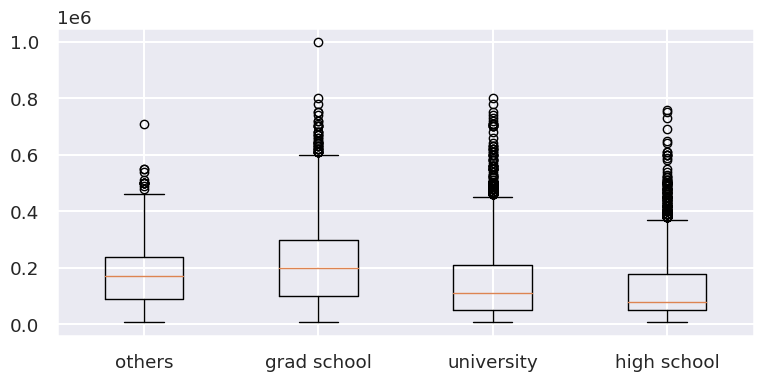

In [26]:
# Chart - 3 visualization code
# Use boxplot to visualize credit limit grouped by education level

data = []
for i in [4,1,2,3]:
    temp = credit_df.loc[credit_df.EDUCATION == i, "LIMIT_BAL"]
    data.append(temp)

fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(["others","grad school", "university", "high school"])

plt.show()

##### 1. Why did you pick the specific chart?

credit card limit for different level of education

##### 2. What is/are the insight(s) found from the chart?

From the boxplot, we can see that customers with grad school education have the highest 25% percentile,highest median,highest 75th percentile and highest maximum numbers, which proves that customers with higher education levels did get higher credit limits.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is important to know the credit card limit to different level of education , since each level shows the maturity of how sure they gave back.

#### Chart - 5 -Limit Balance vs Sex

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

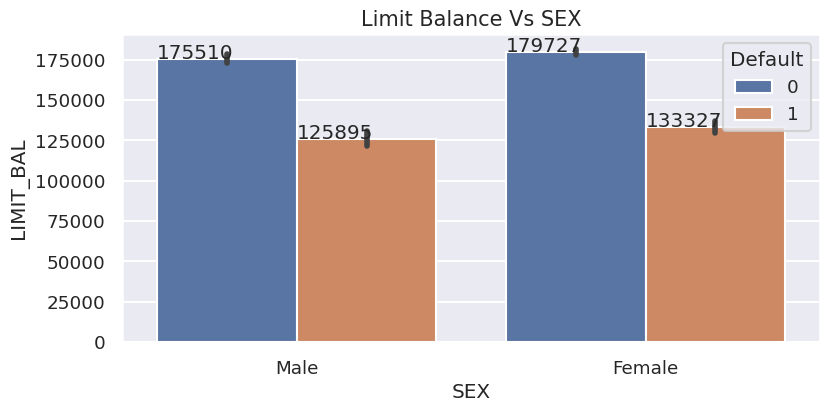

In [27]:
# Chart - 5 visualization code
# Limit Balance Vs SEX
bar = sns.barplot(data=credit_df, x='SEX', y='LIMIT_BAL',hue='Default')
bar.set_title('Limit Balance Vs SEX', size=15)

# adding value count on the top of bar
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories   
# Gender (1=male, 2=female)          
bar.set_xticklabels(['Male', 'Female'])

##### 1. Why did you pick the specific chart?

Defaulting ratio of male and female as per the limit balance

##### 2. What is/are the insight(s) found from the chart?

Female gets more credit limits than male but the default ratio is almost same 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. As per the insights it is notable that male and female are having an average credit limit balance of 1.7 lakh

#### Chart - 6- Marital status and default payment

[Text(0, 0, 'Others'),
 Text(1, 0, 'Married'),
 Text(2, 0, 'Single'),
 Text(3, 0, 'Divorce')]

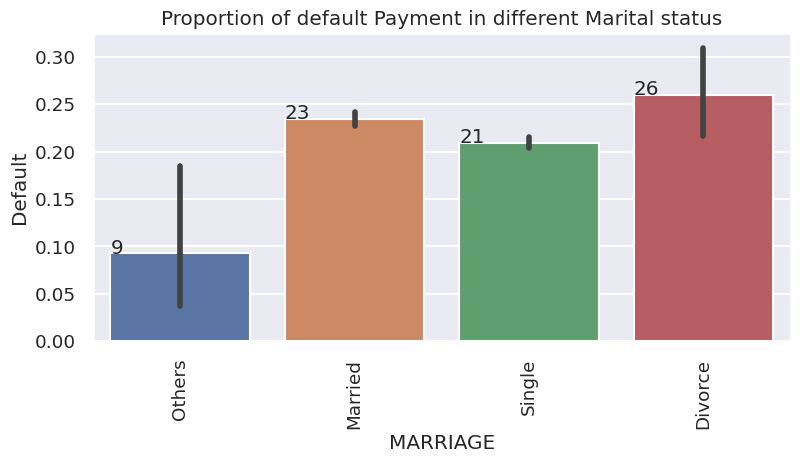

In [28]:
# Chart - 7 visualization code
# MARRIAGE Vs Default Payment
bar = sns.barplot(data=credit_df, x='MARRIAGE', y='Default')
bar.set_title('Proportion of default Payment in different Marital status')

# adding value count on the top of bar
for p in bar.patches:
    bar.annotate(format(p.get_height()*100, '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories   
# Marital status (1 = married; 2 = single; 3 = divorce; 0=others)          
bar.set_xticklabels(['Others','Married','Single', 'Divorce'], rotation=90)

##### 1. Why did you pick the specific chart?

proportion of default payment in different marital status

##### 2. What is/are the insight(s) found from the chart?

The number of defaults appears to be highest among divorced people (26%) and lowest among single people (21%) (ignoring "Others" due to the low count).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is a high chance of default in payment with the people who are divorced when compared to others and lowest  default payment is by singles

#### Chart - 7- Marriage vs default payment with sex

In [29]:
# Chart - 6 visualization code
credit_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

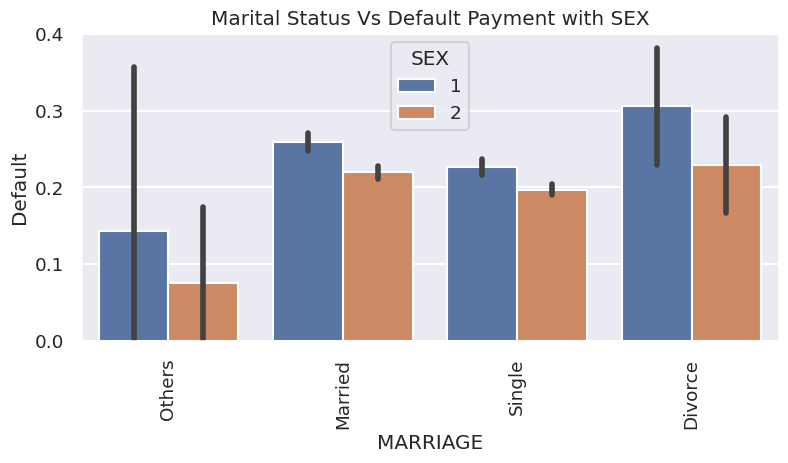

In [30]:
# MARRIAGE Vs Default Payment with SEX
bar = sns.barplot(data=credit_df, x='MARRIAGE', y='Default', hue='SEX')
bar.set_title('Marital Status Vs Default Payment with SEX')

# Assign labels to the x-axis categories   
# Marital status (1 = married; 2 = single; 3 = divorce; 0=others)          
bar.set_xticklabels(['Others','Married','Single', 'Divorce'], rotation=90)
plt.show()
     

##### 1. Why did you pick the specific chart?

To know the default of credit card payment according to the marital status

##### 2. What is/are the insight(s) found from the chart?

In all Marital status females have less default percentage than males.

#### Chart - 8 - boxplot

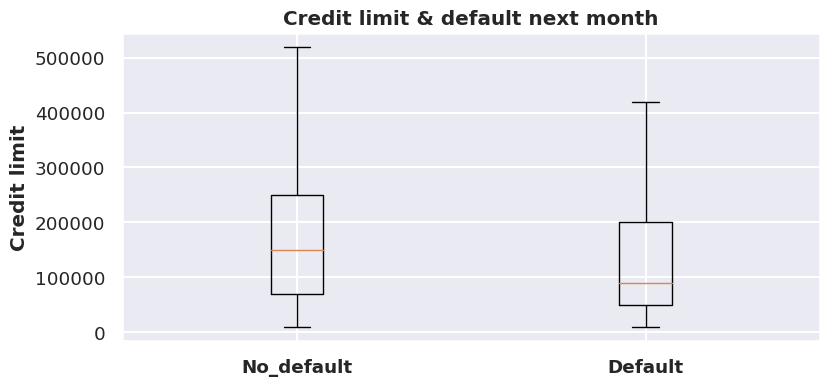

In [31]:
# Chart - 8 visualization code
# Make a boxplot to visualize credit limit and default payment next month
# 1: default next month; 0: no default next month

default_0 = credit_df.loc[credit_df['Default'] == 0,'LIMIT_BAL']
default_1 = credit_df.loc[credit_df['Default'] == 1,'LIMIT_BAL']

fig, ax = plt.subplots()
ax.boxplot([default_0, default_1],  showfliers=False)

ax.set_xticklabels(['No_default',"Default"],fontweight ='bold')
ax.set_ylabel('Credit limit',fontweight ='bold')
ax.set_title('Credit limit & default next month',fontweight ='bold')

plt.show()

##### 1. Why did you pick the specific chart?

Selected the box plot to find the relation between the credit limit and default 

##### 2. What is/are the insight(s) found from the chart?

peeple with higher credit limit tend to avoid any default payment , that is people having credit limit tries to pay on time higher compared to customers having lower credit limit

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The amount of credit limit does matter but in a different way as we think. people having higher limit often pay back on time , eventhough they need to pay large amount of money than those having lower credit limit 

#### Chart - 9 - Age

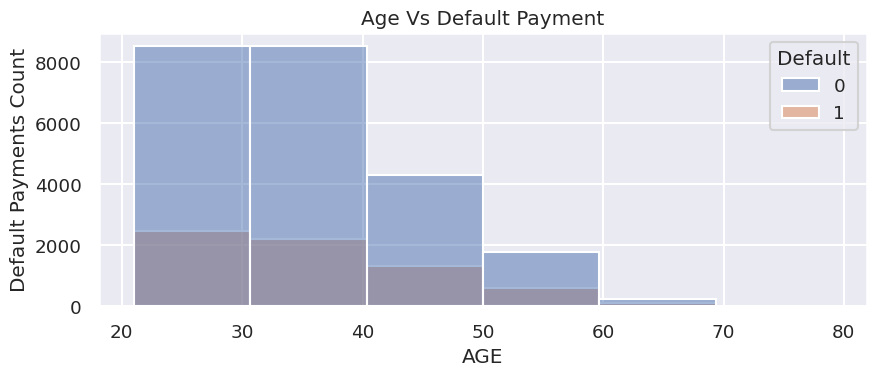

In [32]:
# Chart - 9 visualization code
# Age Vs Default Payment
figsize=(12,12)
hist = sns.histplot(data=credit_df, x='AGE', hue='Default', bins=6)
hist.set(title='Age Vs Default Payment',ylabel='Default Payments Count')
plt.tight_layout()
plt.show()
     

##### 1. Why did you pick the specific chart?

distribution of age

##### 2. What is/are the insight(s) found from the chart?

With an increase in the age group the count of default payments decreases.

#### Chart - 10- Bill amt vs default

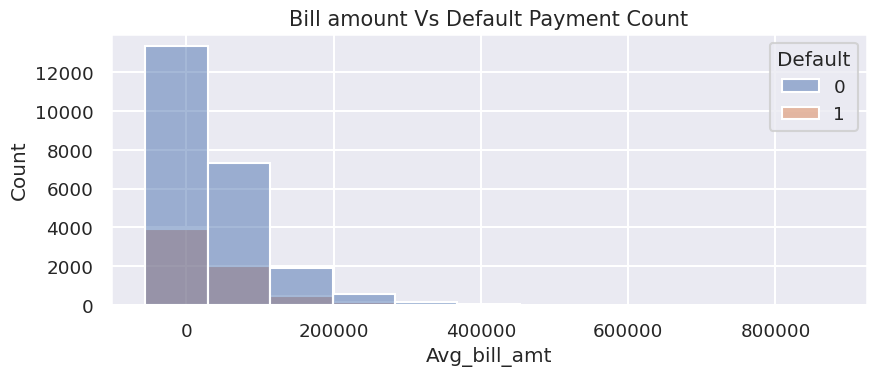

In [33]:
# Chart - 10 visualization code

credit_df['Avg_bill_amt'] =(credit_df['BILL_AMT1']+credit_df['BILL_AMT2']+credit_df['BILL_AMT3']+credit_df['BILL_AMT4']+credit_df['BILL_AMT5']+credit_df['BILL_AMT6'])/6
# Bill amount Vs Default Payment Count
hist = sns.histplot(data=credit_df, x='Avg_bill_amt', hue='Default',bins=11)
hist.set_title('Bill amount Vs Default Payment Count', size=15)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bill amount of users

##### 2. What is/are the insight(s) found from the chart?

Most of the defaults are from customers who have negative and up to 2 lakh bill amount on an average in the last 6 months.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11 - Correlation Heatmap

In [34]:
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default',
       'Avg_bill_amt'],
      dtype='object')

<Axes: >

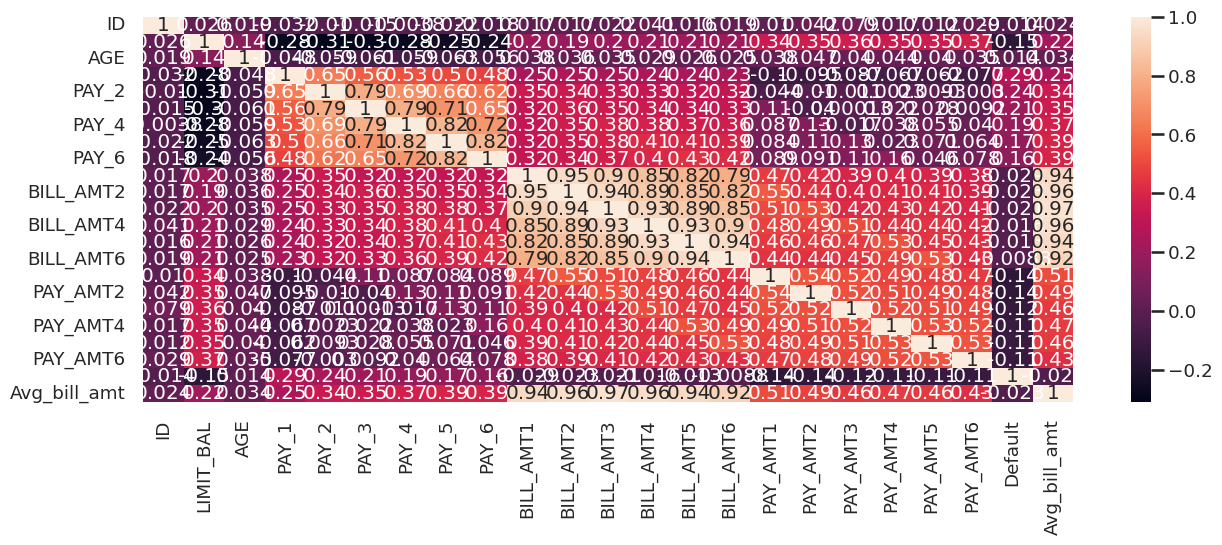

In [51]:
# Correlation Heatmap visualization code
# Plotting correlation heatmap
plt.figure(figsize=(15,5))
sns.heatmap(credit_df.corr(), annot=True) 

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [40]:
# Handling Missing Values & Missing Value Imputation
credit_df.isnull().sum()

ID              0
LIMIT_BAL       0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_1           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5           0
PAY_6           0
BILL_AMT1       0
BILL_AMT2       0
BILL_AMT3       0
BILL_AMT4       0
BILL_AMT5       0
BILL_AMT6       0
PAY_AMT1        0
PAY_AMT2        0
PAY_AMT3        0
PAY_AMT4        0
PAY_AMT5        0
PAY_AMT6        0
Default         0
Avg_bill_amt    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There isnt any null values

### 2. Handling Outliers

In [52]:
# splitting data into numerical and categorical features for future conveniance
numerical_features = []
categorical_features = []
for i in credit_df.columns:
  if credit_df[i].nunique() > 15:
    numerical_features.append(i)
  else:
    categorical_features.append(i)
print(f'numerical features are {numerical_features}')
print(f'categorical features are {categorical_features}')

numerical features are ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Avg_bill_amt']
categorical features are ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Default']


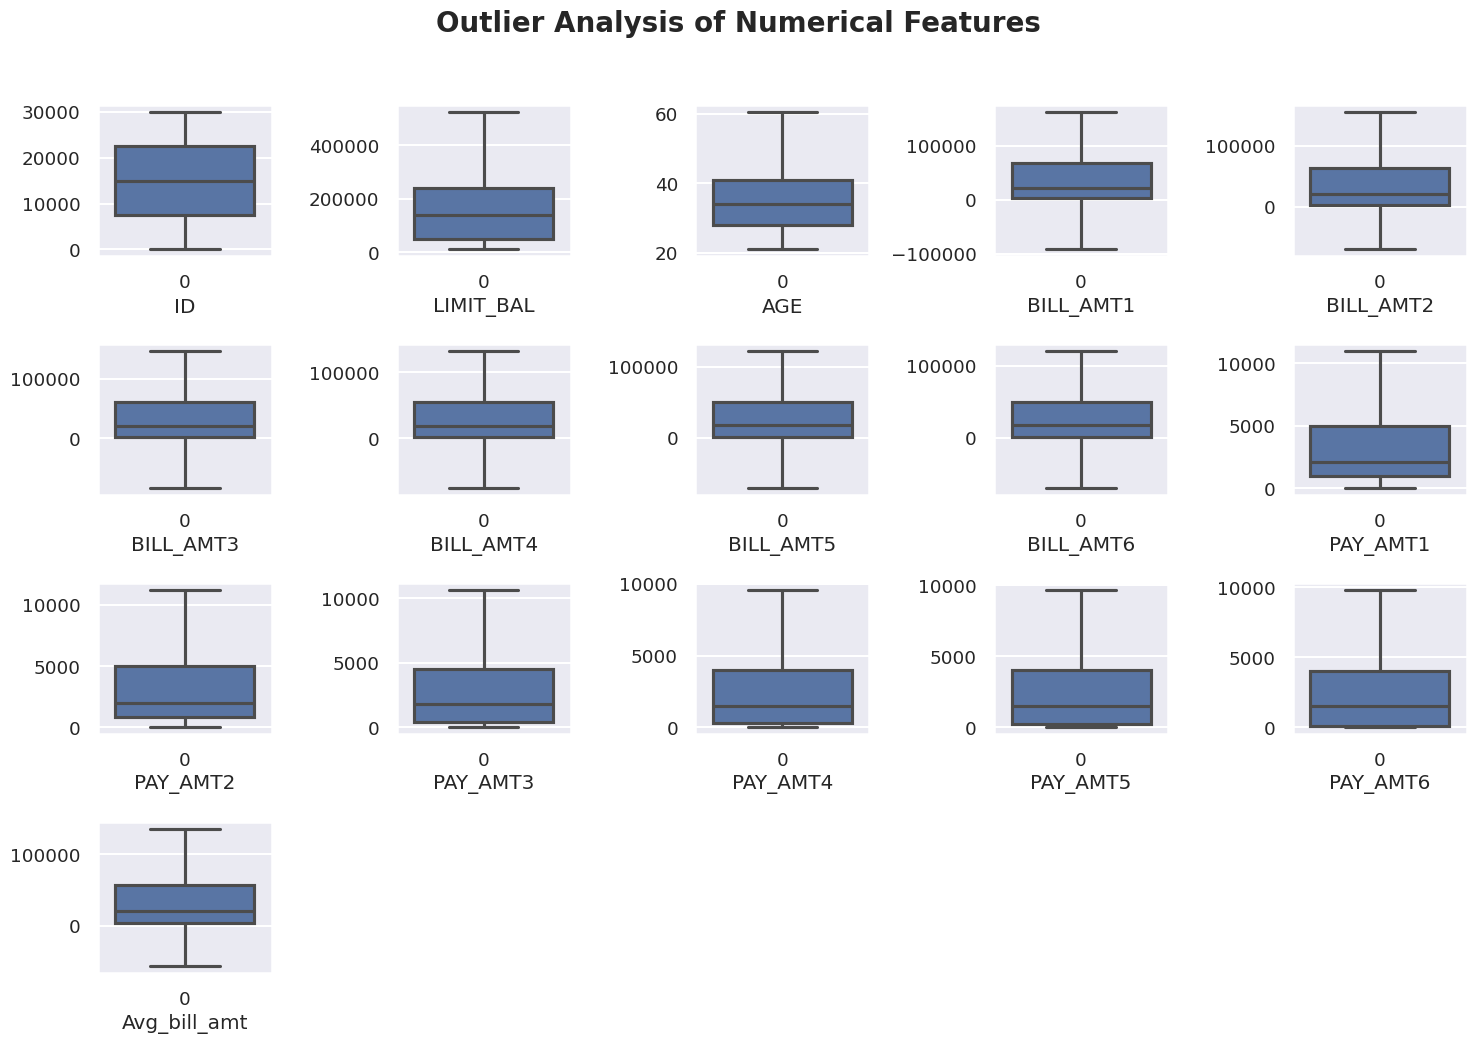

In [53]:
# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(5, 5, i+1)            # subplot of 4 rows and 5 columns

  # countplot
  sns.boxplot(credit_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()
     

There are several outliers present in th data . Outliers can be visualised as the dots outside the whiskers in the boxplots. The majority of the continuous variables seem to contain outliers. we are doing capping here to remove the outliers

In [54]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def capping_outliers(credit_df):
    for col in credit_df[numerical_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = credit_df[col].quantile(0.25)
        q3 = credit_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # replacing the outliers with upper and lower bound
        credit_df[col] = credit_df[col].clip(lower_bound, upper_bound)
    return credit_df

In [55]:
# using the function to treat outliers
credit_df = capping_outliers(credit_df)

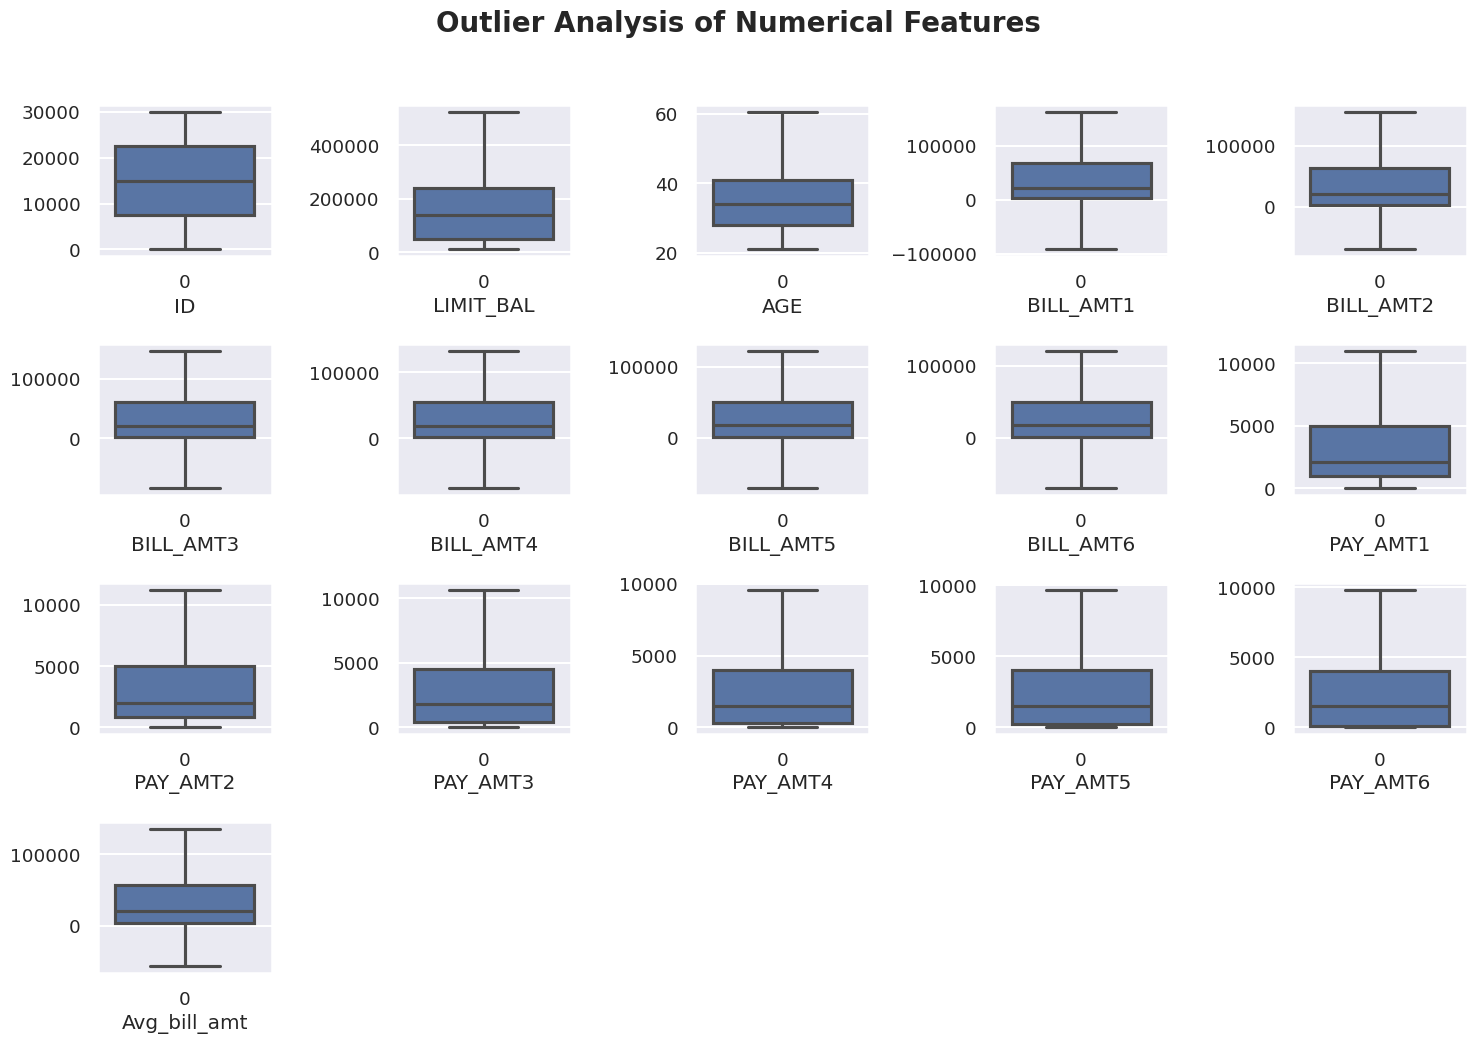

In [56]:
# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(5, 5, i+1)            # subplot of 4 rows and 5 columns

  # countplot
  sns.boxplot(credit_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have used capping method . in this method we are putting cap on outliers data , means if a value higher or lower than a certain threshold value, it is considered as oultiers and replacing those values with the lower bound value or upper bound value as per the nature of values.


### 3. Categorical Encoding

In [57]:
# Encode your categorical columns
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            30000 non-null  int64  
 1   LIMIT_BAL     30000 non-null  int64  
 2   SEX           30000 non-null  object 
 3   EDUCATION     30000 non-null  object 
 4   MARRIAGE      30000 non-null  object 
 5   AGE           30000 non-null  float64
 6   PAY_1         30000 non-null  float64
 7   PAY_2         30000 non-null  float64
 8   PAY_3         30000 non-null  float64
 9   PAY_4         30000 non-null  float64
 10  PAY_5         30000 non-null  float64
 11  PAY_6         30000 non-null  float64
 12  BILL_AMT1     30000 non-null  float64
 13  BILL_AMT2     30000 non-null  float64
 14  BILL_AMT3     30000 non-null  float64
 15  BILL_AMT4     30000 non-null  float64
 16  BILL_AMT5     30000 non-null  float64
 17  BILL_AMT6     30000 non-null  float64
 18  PAY_AMT1      30000 non-nu

#### What all categorical encoding techniques have you used & why did you use those techniques?

All the data in here either int or float , so there isnt any need of categorical encoding. we just need to change the datatype to object

In [58]:
categorical_features.remove('Default')

In [59]:
credit_df[categorical_features] = credit_df[categorical_features].astype(str)

In [60]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            30000 non-null  int64  
 1   LIMIT_BAL     30000 non-null  int64  
 2   SEX           30000 non-null  object 
 3   EDUCATION     30000 non-null  object 
 4   MARRIAGE      30000 non-null  object 
 5   AGE           30000 non-null  float64
 6   PAY_1         30000 non-null  object 
 7   PAY_2         30000 non-null  object 
 8   PAY_3         30000 non-null  object 
 9   PAY_4         30000 non-null  object 
 10  PAY_5         30000 non-null  object 
 11  PAY_6         30000 non-null  object 
 12  BILL_AMT1     30000 non-null  float64
 13  BILL_AMT2     30000 non-null  float64
 14  BILL_AMT3     30000 non-null  float64
 15  BILL_AMT4     30000 non-null  float64
 16  BILL_AMT5     30000 non-null  float64
 17  BILL_AMT6     30000 non-null  float64
 18  PAY_AMT1      30000 non-nu

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [61]:
# Manipulate Features to minimize feature correlation and create new features
credit_df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,Avg_bill_amt
0,1,20000,2,2,1,24.0,1.5,1.5,-1.0,-1.0,...,0.0,0.0,0,689.0,0.0,0.0,0,0.0,1,1284.000000
1,2,120000,2,2,2,26.0,-1.0,1.5,0.0,0.0,...,3455.0,3261.0,0,1000.0,1000.0,1000.0,0,2000.0,1,2846.166667


<Axes: >

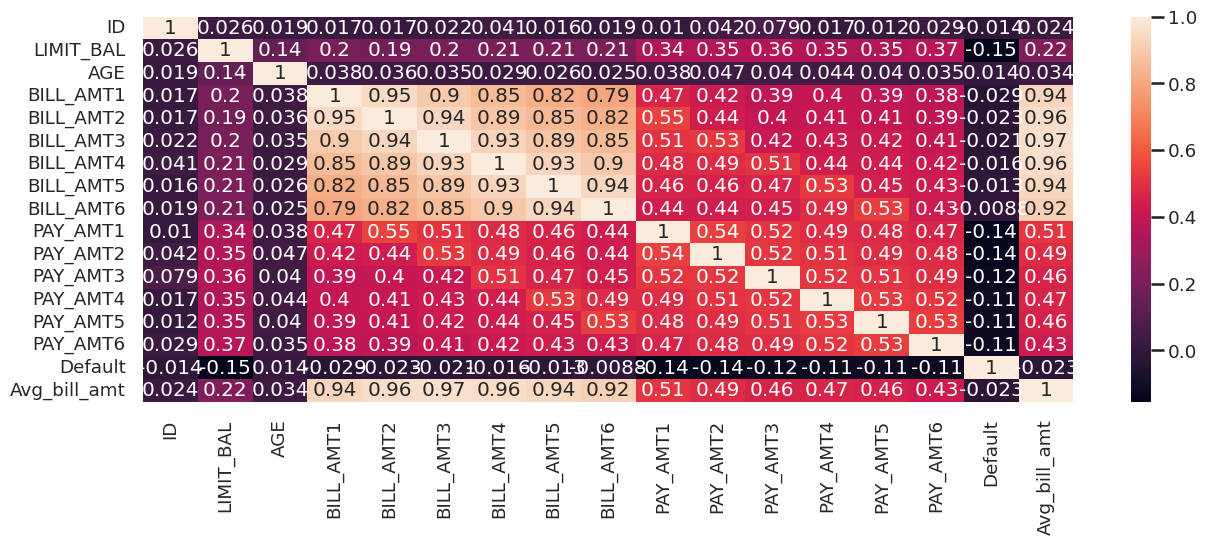

In [65]:
# Plotting correlation heatmap
plt.figure(figsize=(15,5))
sns.heatmap(credit_df.corr(), annot=True)   

there is a high correlation between bill_amt variables, so we have to remove it leaving only one bill amt(bill_Amt1)

In [66]:
credit_df.drop(['Avg_bill_amt','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'], axis=1, inplace=True)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***